# Khái niệm về cây quyết định

Trong cuộc sống có rất nhiều tình huống chúng ta quan sát, suy nghĩ và ra quyết định bằng cách đặt câu hỏi. Xuất phát từ đó, trong Machine Learning có một mô hình được thiết kế dưới dạng các câu hỏi, mà ở đó các câu hỏi được sắp xếp dưới dạng cây. Đó chính là mô hình cây quyết định mà chúng ta sẽ tìm hiểu trong bài viết này. 

Vậy cây quyết định là gì? Bản chất của cây quyết định là một đồ thị có hướng được sử dụng cho việc ra quyết định. Lấy ví dụ, sau khi biết điểm thi tốt nghiệp THPT, bạn muốn xây dựng một chiến lược đăng kí ngành học bằng một loạt các lựa chọn:

* Nếu tổng ba môn của bạn là lớn hơn 28.5 bạn sẽ nộp vào ngành CNTT. 
* Trái lại, nếu điểm thi của bạn nhỏ hơn hoặc bằng 28.5 thì vẫn còn cơ hội cho bạn nếu điểm Toán cao vì điểm Toán có hệ số nhân là 2. Do đó bạn quyết định vẫn lựa chọn CNTT nếu điểm Toán được 10. Trường hợp còn lại bạn đăng ký vào ngành KTĐTVT.

Tập hợp các câu hỏi và lựa chọn của bạn có thể ở trên được khái quát thành một cây quyết định:

![](https://imgur.com/7JRSLF4.png)

Cây quyết định ở sơ đồ trên còn được gọi là cây quyết định nhị phân vì một câu hỏi chỉ có hai phương án là True hoặc False. Trên thực tế có thể có những dạng cây quyết định khác nhiều hơn hai phương án cho một câu hỏi.

chúng ta có một số khái niệm liên quan tới _cây quyết định_:

* node gốc (_root node_): Là node ở vị trí đầu tiên của cây quyết định. Mọi phương án đều bắt nguồn từ node này. Ở ví dụ trên là (Tổng điểm >= 28.5)

* node cha (_parent node_): Là node mà có thể rẽ nhánh xuống những node khác bên dưới. Node bên dưới được gọi là node con.

* node con (_child node_): Là những node tồn tại node cha.

* node lá (_leaf node_): Là node cuối cùng của một quyết định. Tại đây chúng ta thu được kết quả dự báo. Node lá ở vị trí cuối cùng nên sẽ không có node con.

* node quyết định (_non-leaf node_): Những node khác node lá.

Từ sơ đồ cây quyết định ở trên, chúng ta nhận thấy một cây quyết định được cấu tạo bởi **node và cạnh**. Tại mỗi node là một câu hỏi (chính là các hình chữ nhật bo góc) dạng yes/no được đặt ra đối với một biến đầu vào. Tuỳ thuộc vào đáp án mà tiếp theo bạn sẽ rẽ sang nhánh True hoặc False. Cứ tiếp tục thực hiện rẽ nhánh như vậy một cách truy hồi cho đến khi thu được câu trả lời tại node cuối cùng.

_Lưu ý:_ Trong sklearn khi sử dụng thuật toán CART thì chúng ta xây dựng một cây nhị phân mà mỗi _node không phải lá_ chỉ gồm 2 _node con_. Trong khi đó các _cây quyết định_ (_decision tree_) sử dụng thuật toán ID3 có thể có nhiều hơn 2 _node con_.

# Mô hình cây quyết định (_decision tree_)

Mô hình _cây quyết định_ là một mô hình được sử dụng khá phổ biến và hiệu quả trong cả hai lớp bài toán phân loại và dự báo của học có giám sát. Khác với những thuật toán khác trong học có giám sát, mô hình _cây quyết định_ không tồn tại phương trình dự báo. Mọi việc chúng ta cần thực hiện đó là tìm ra một cây quyết định dự báo tốt trên tập dữ liệu huấn luyện và sử dụng cây quyết định này dự báo trên tập kiểm tra. 

Vậy một cây quyết định sẽ được xây dựng như thế nào? Điều gì ẩn chứa sau thuật toán cây quyết định? Để trả lời cho câu hỏi này, chúng ta cùng lấy ví dụ về áp dụng mô hình cây quyết định cho bài toán phân loại giá nhà trên bộ dữ liệu boston.



# Bài toán phân loại cây quyết định trên bộ dữ liệu boston

Bộ dữ liệu được sử dụng cho bài toán này là bộ dữ liệu về giá nhà ở ở boston bao gồm 13 quan sát và 506 biến.

Đọc dữ liệu:

In [ ]:
from sklearn.datasets import load_boston
import numpy as np

boston = load_boston()
X = boston.data
y = boston.target
y = [1 if price > 20 else 0 for price in y] # 1 nhà giá cao, 0 nhà giá thấp
y = np.array(y)

print('Input features: ', ', '.join(boston.feature_names))
print(X.shape)

Input features:  CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT
(506, 13)


Ý nghĩa của những trường dữ liệu:

Các biến đầu vào:

* crim: Tỷ lệ phạm tội phạm bình quân đầu người theo thị trấn.
* zn: Tỷ lệ đất ở được quy hoạch cho các lô trên 25.000 foot square.
* indus: Tỷ lệ diện tích thuộc lĩnh vực kinh doanh phi bán lẻ trên mỗi thị trấn.
* chas: Biến giả, = 1 nếu được bao bởi sông Charles River, = 0 nếu ngược lại.
* nox: Nồng độ khí Ni-tơ oxit.
* rm: Trung bình số phòng trên một căn hộ.
* age: Tỷ lệ căn hộ được xây dựng trước năm 1940.
* dis: Khoảng cách trung bình có trọng số tới 5 trung tâm việc làm lớn nhất ở Boston.
* rad: Chỉ số về khả năng tiếp cận đường cao tốc.
* tax: Giá trị thuế suất tính trên đơn vị 10000$.
* ptratio: Tỷ lệ học sinh-giáo viên trên mỗi thị trấn.
* black: Tỷ lệ số người da đen trong thị trấn được tính theo công thức: 1000(Bk−0.63)2 ở đây Bk là tỷ lệ người da đen trong thị trấn.
* lstat: Tỷ lệ phần trăm dân số thu nhập thấp.

Biến mục tiêu: Căn cứ vào giá nhà ở > 20 nghìn USD hoặc nhỏ hơn mà chúng ta phân thành nhãn 1 (giá cao) và nhãn 0 (giá thấp).

Tiếp theo ta sẽ xây dựng một mô hình phân loại dự trên cây quyết định với độ sâu tối đa là 3. Độ sâu ở đây chính là số lượng tối đa các câu hỏi khi đi từ node gốc tới node lá. Chúng ta khai báo độ sâu thông qua đối số _max_depth_.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Tiếp theo là sử dụng hàm `export_graphviz()` để biểu đồ hoá cây quyết định. Trong hàm này chúng ta chỉ cần truyền vào mô hình, tên các đặc trưng đầu vào thông qua đối số `feature_names` và các nhãn thông qua đối số `class_names`.

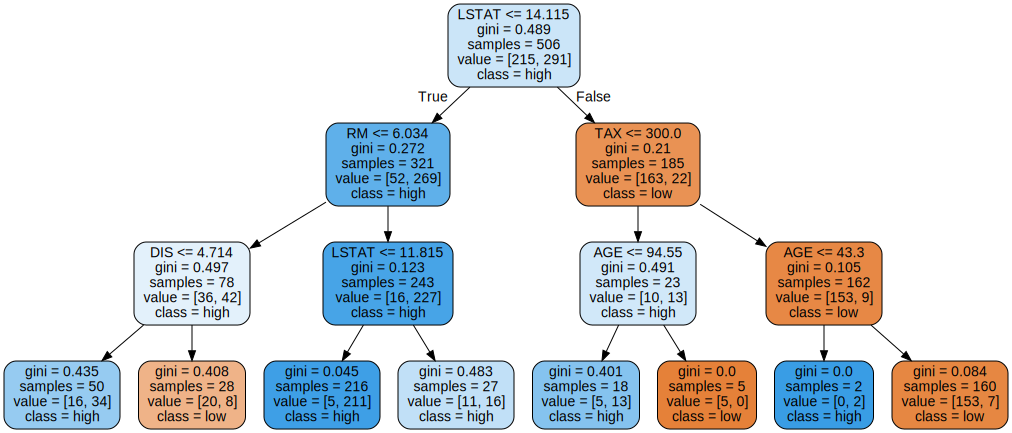

In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                                feature_names=boston.feature_names,  
                                class_names=['low', 'high'],
                                rounded=True,
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

**Cách dự báo từ cây quyết định**

Từ cây quyết định chúng ta có thể suy ra được nhãn dự báo cho mọi quan sát. Giả sử quan sát đầu vào có giá trị: `LSTAT = 10, RM = 6, DIS = 3`. Khi đó xuất phát từ cây nhị phân ta thấy:

* LSTAT <= 14.115, như vậy tại node đầu tiên sẽ rẽ sang nhánh True bên trái.
* Tiếp theo ta lại xét tiếp câu hỏi RM <= 6.034, kết quả trả về là True. Do đó ta lại rẽ xuống nhánh bên trái.
* Tiếp theo xét tiếp câu hỏi DIS <= 4.714, kết quả trả về tiếp tục là True. Do đó ta rẽ sang bên trái và thu được kết quả dự báo ở node lá là nhãn high.

Để minh chứng cho nhận định trên, ta sẽ thử nghiệm dự báo cho 5 quan sát sao cho giá trị `LSTAT = 10, RM = 6, DIS = 3` là cố định và những giá trị khác thay đổi ngẫu nhiên.

In [ ]:
import pandas as pd

# LSTAT = 10, RM = 6, DIS = 3, các giá trị khác có thể thay đổi tuỳ ý

for i in range(5):
  CRIM = np.random.randint(0, 100)
  INDUS = np.random.randint(0, 100)
  ZN = np.random.randint(0, 100)
  CHAS = np.random.randint(0, 100)
  NOX = np.random.randint(0, 100)
  AGE = np.random.randint(0, 100)
  RAD = np.random.randint(0, 100)
  TAX = np.random.randint(0, 100)
  PTRATIO = np.random.randint(0, 100)
  B = np.random.randint(0, 100)

  x = pd.DataFrame({'CRIM':CRIM, 'ZN':ZN, 'INDUS':INDUS, 'CHAS':CHAS, 'NOX':NOX, 'RM':[6], 'AGE':AGE, 'DIS':[3], 'RAD':RAD, 'TAX':TAX, 'PTRATIO':PTRATIO, 'B':B, 'LSTAT':[10]})
  y_pred = tree_clf.predict_proba(x)[0]
  print('probability low {}, high {}'.format(y_pred[0], y_pred[1]))
  print('predicted label {}'.format(tree_clf.predict(x)[0]))

probability low 0.32, high 0.68
predicted label 1
probability low 0.32, high 0.68
predicted label 1
probability low 0.32, high 0.68
predicted label 1
probability low 0.32, high 0.68
predicted label 1
probability low 0.32, high 0.68
predicted label 1


Chúng ta thấy dù có thay đổi các giá trị khác như thế nào, miễn là 3 giá trị `LSTAT = 10, RM = 6, DIS = 3` thoả mãn thì chúng ta đều thu được dự báo có nhãn là 1. Điều này cho thấy dự báo từ cây nhị phân đã tuân theo qui luật rẽ nhánh in đậm như bên dưới:


![](https://imgur.com/V8Gyi63.png)


# Đường biên phân chia của cây quyết định.

Đường biên phân chia của cây quyết định sẽ dựa trên kịch bản rẽ nhánh mà chúng ta lựa chọn. Gỉa định chúng ta đi từ node `(LSTAT <= 14.115) --> (RM <= 6.034) --> (DIS <= 4.714)`. Khi đó đường biên phân chia là những đường thẳng được xác định từ ngưỡng threshold.

Hình vẽ:

* Bước 1: Đường thẳng $x = 14.115$ sẽ phân mặt phẳng thành 2 phần là $x \leq 14.115$ và $x > 14.115$. Theo phương án rẽ nhánh, chúng ta chỉ quan tâm tới nửa mặt phẳng $x \leq 14.115$ nằm bên trái.

* Bước 2: Đối với nửa mặt phẳng $x \leq 14.115$ chúng ta lại xét tiếp trục y tương ứng với biến RM. Đường thẳng $y = 6.034$ sẽ tiếp tục chia nửa mặt phẳng này thành hai phần là $y > 6.034$ và $y \leq 6.034$. Theo kịch bản chúng ta sẽ lựa chọn hình chữ nhật bị giới hạn bởi $x \geq 14.115$ và $y \geq 6.034$. Lúc này đường biên vẫn chưa thực sự xuất hiện. Chúng ta phải tiếp tục phân chia tiếp theo threshold của biến DIS.

* Đường thẳng $x = 4.714$ sẽ tiếp tục phân chia hình chữ nhật thu được ở bước 2 thành hai hình chữ nhật con. Ta chỉ lấy hình chữ nhật nằm bên trái. Đó chính là hình chữ nhật bị giới hạn bởi các cạnh in đậm.
 
Chúng ta để ý thấy rằng mọi điểm nằm trong hình chữ nhật có các cạnh in đậm sẽ cùng được dự báo thuộc về nhóm `high` hình tròn như hình vẽ. Đối với những điểm nằm ngoài hình chữ nhật này thì có thể lẫn cả nhãn `high` và nhãn `low` và chúng ta cần những kịch bản rẽ nhánh khác để dự báo nhãn cho chúng.


# Làm cách nào để một cây quyết định được tạo ra

Để trả lời cho câu hỏi một cây quyết định được tạo ra như thế nào? Chúng ta cần biết được **thứ tự câu hỏi** là gì và **cách đặt câu hỏi** như thế nào? 


**Thứ tự lựa chọn câu hỏi**

Đối với những bộ dữ liệu có số lượng quan sát $d$ lớn, việc lựa chọn biến nào sẽ được đặt ở _node gốc_ là điều không dễ dàng. Một kịch bản lựa chọn ngẫu nhiên chỉ có xác suất đúng là $\frac{1}{d}$ và dường như khả năng chúng ta chọn sai là rất cao. Do đó chúng ta cần phải có một tiêu chí nào đó để lựa chọn biến phù hợp. Xuất phát từ yêu cầu này, chúng ta hình thành nên các độ đo về Gini đo lường mức độ tinh khiến (_purity_) và vẩn đục (_impurity_) của một biến mà ta sẽ tìm hiểu bên dưới.





## Tinh khiết và vẩn đục

Xét ba kịch bản trả ra tại một node lá cho bài toán phân loại nhị phân.

* Kịch bản 1: 50 nhãn 1, 50 nhãn 0.
* Kịch bản 2: 20 nhãn 1, 30 nhãn 0.
* Kịch bản 3: 0 nhãn 1, 50 nhãn 0.

Theo bạn đâu sẽ là kịch bản phù hợp nhất?

Kịch bản 1 dường như là vô nghĩa vì nó tương đương với lựa chọn ngẫu nhiên giữa nhãn 0 và 1.

Kịch bản 2 có xu hướng dự báo thiên về nhãn 0 nhưng tỷ lệ dự báo sai nhãn 1 vẫn còn cao.

Kịch bản 3 là tuyệt vời vì chúng ta đã dự báo đúng hoàn toàn nhãn 0. 

Như vậy mục tiêu của chúng ta khi đối diện với việc phân loại đó là kết quả trả về tại node lá chỉ thuộc về một lớp. Chúng ta sử dụng một thuật ngữ ngắn gọn để gọi tên trường hợp này là tinh khiết (_purity_). Trái ngược lại với tinh khiết sẽ là khái niệm vấn đục (_impurity_), tức phân phối của các nhãn tại node lá còn khá mập mờ, không có xu hướng thiên về một nhãn nào cụ thể. Nếu ra quyết định phân loại dựa trên kịch bản dẫn tới node lá sẽ không đáng tin cậy.

## Thước đo cho mức độ tinh khiết

Để đo lường mức độ tinh khiết, chúng ta sử dụng hàm entropy. Đây là một hàm số xuất phát từ lý thuyết thông tin và ngoài ra, nó còn được sử dụng ở nhiều lĩnh vực khác như hoá học, vật lý, y sinh,.... Hàm số này cho ta biết mức độ mức độ không chắc chắn (_uncertainty_), hỗn loạn (_disorder_) của một sự kiện.

Giả sử một sự kiện xảy ra với phân phối xác suất là $\mathbf{p} = (p_1, p_2, \dots, p_C)$ thoả mãn $\sum_{i=1}^{C} p_i = 1$. Khi đó hàm entropy đối với sự kiện trên là:

$$\mathbf{H}(\mathbf{p}) = -\sum_{i=1}^{C}p_i \log p_i$$

Trong trường hợp $p_i = 0$ thì hàm entropy là không xác định, tuy nhiên chúng ta sẽ qui ước giá trị của entropy trong trường hợp này là 0.

Trong lý thuyết thông tin chúng ta lấy $\log$ là hàm logarith với cơ số 2. Tuy nhiên ở đây chúng ta có thể sử dụng là logarith cơ số tự nhiên mà không thay đổi bản chất do giá trị đạt được tương đương với việc nhân với một hằng số.

Chúng ta sẽ nhận thấy rằng Entropy là một hàm không âm có giá trị tối đa đạt được khi phân phối xác suất là đồng đều trên toàn bộ các nhãn.


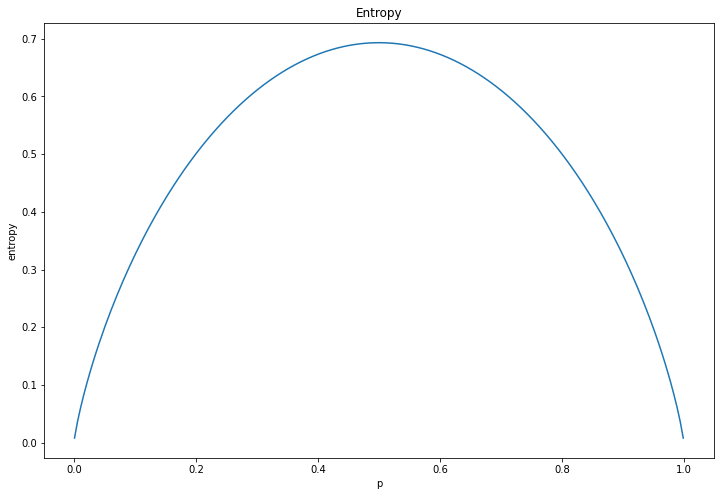

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tính entropy theo p
def _entropy(p):
  return -(p*np.log(p)+(1-p)*np.log((1-p)))

# Khởi tạo gía trị yhat từ 0 đến 1
p = np.linspace(0.001, 0.999, 200)

# Hàm visualize cross entropy
def _plot_crs(p):
  entropy = _entropy(p)
  plt.figure(figsize = (12, 8))
  plt.plot(p, entropy)
  plt.xlabel('p')
  plt.ylabel('entropy')
  plt.title('Entropy')
  plt.show()

_plot_crs(p)

Điều này là đúng vì $1 \geq p_i \geq 0$ nên giá trị $\mathbf{H}(\mathbf{p}) \geq 0$.

Mặt khác hàm $f(x) = -x\log{x}$ có đạo hàm bậc 2 là $f''(x) = \frac{-1}{x} \geq 0$ nên là một hàm lõm trên khoảng $(0, 1]$. Áp dụng bất đẳng thức Jensen đối với hàm lồi ta có:

$$
\mathbf{H}(\mathbf{p}) = \sum_{i=1}^C f(p_1) \geq  C f(\frac{\sum_{i=1}^C p_i}{C}) = Cf(\frac{1}{C}) = -\log C
$$

Giá trị entropy cực đại đạt được khi phân phối $\mathbf{p}$ là tinh khiết nhất, tức phân phối hoàn toàn thuộc về một nhóm. Trái lại, entropy đạt cực tiểu khi toàn bộ xác suất thuộc về các nhóm là bằng nhau. Một phân phối có entropy càng cao thì mức độ tinh khiết của phân phối đó sẽ càng lớn.


Nhu vậy bản chất của entropy đó là một thước đo để đo lường độ tinh khiết của phân phối xác suất trả ra tại mỗi node. Bước tiếp theo, dựa trên hàm entropy làm sao để lựa chọn ra được thứ tự biến để đặt câu hỏi? Chúng ta sẽ dựa trên cách tìm kiếm _tham lam từ trên xuống_ (_top-down greedy_).

## Tìm kiếm tham lam và truy hồi

Giả sử số lượng biến của bạn là $d$ rất lớn. Bạn muốn tạo ra một cây nhị phân với độ sâu tối đa là $n$. Số cách sắp xếp các biến này theo thứ tự không lặp lại sẽ là chỉnh hợp $A_n^d = \frac{d!}{(d-n)!}$. Số lượng các kịch bản rẽ nhánh có thể tạo ra là rất lớn. Do đó rất khó để chúng ta tìm được đúng cây nhị phân tối ưu ngay từ đầu. Thay vào đó chúng ta sẽ chia bài toán thành các bước nhỏ và tìm cách lựa chọn tối ưu câu hỏi ở node tiếp theo. Chiến lược như vậy được gọi là tìm kiếm tham lam.

Ngoài ra quá trình lựa chọn này sẽ tiếp diễn một cách truy hồi (_recursive_) từ trên xuống dưới cho đến khi đạt ngưỡng về độ sâu hoặc node cuối cùng hoàn toàn thuộc về một nhóm. Ở một số thuật toán, để hạn chế hiện tượng _quá khớp_ chúng ta có thể dừng phân chia nếu chạm ngưỡng số lượng quan sát tối thiểu ở một node lá (chúng ta sẽ làm rõ hơn điều này ở phần bên dưới).



## Thuật toán ID3

Thuật toán ID3 là một giải thuật được ra đời từ khá lâu đời và được sử dụng phổ biến trong bài toán cây nhị phân. Ngoài thuật toán ID3 chúng ta còn sử dụng một số giải thuật khác cũng khá quan trọng:

* C4.5: Kế thừa của thuật toán ID3.
* CART: Viết tắt của cụm từ _Classification And Regression Tree_. Ưu điểm của nó là có thể sử dụng cho cả bài toán phân loại và hồi qui.
* CHAID: Sử dụng phân phối $\chi^2$ để tự động tương tác phát hiện phân chia  khi tính toán cây phân loại.
* MARS: Áp dụng hồi qui đa biến theo splines. Đây là một phương pháp hồi qui chia để trị, có thể loại bỏ ảnh hưởng của outliers.

Trong khuôn khổ bài viết này chúng ta chỉ quan tâm tới thuật toán ID3. Để tìm hiểu ý tưởng của thuật toán này một cách dễ hiểu, chúng ta xét với trường hợp cây nhị phân

## Trường hợp cây nhị phân

Giả định chúng ta đang đứng ở node lá bất kỳ, các quan sát tại rơi vào node này là tập $\mathcal{S}$ có kích thước $|\mathcal{S}|=N$.
Tại node lá này thì mức độ tinh khiết được đánh giá thông qua hàm thông tin entropy được tính theo công thức:

$$\mathbf{H}(\mathcal{S}) = - \sum_{i=1}^C p_i \log(p_i)$$

Trong đó $p_i$ là tỷ lệ phần trăm các quán sát thuộc về nhãn $i$.

Một câu hỏi đặt ra là liệu tiếp tục phân chia thì có tốt hơn không? và chúng ta phải lựa chọn biến nào tiếp theo? Và nếu là biến liên tục thì lựa chọn ngưỡng phân chia như thế nào? Giả định biến được lựa chọn là $x_j$ tương ứng với ngưỡng phân chia là $t$. Ngưỡng này giúp phân tập $\mathcal{S}$ thành hai tập con tương ứng là:

$$
\begin{split}
\left\{
\begin{matrix}
\mathcal{S}_0 = \{ \mathbf{x}_i | x_{ij} \leq t, \mathbf{x}_i \in \mathcal{S}, \mathbf{x}_i \in \mathbb{R}^{m} \} \\
\mathcal{S}_1 = \{ \mathbf{x}_i | x_{ij} > t, \mathbf{x}_i \in \mathcal{S},\mathbf{x}_i \in \mathbb{R}^{m} \}\end{matrix}
\right.\end{split}
$$

Trong đó $\mathbf{x}_i$ là quan sát thứ $i$ của tập $\mathcal{S}$ bao gồm $m$ chiều tương ứng với số lượng biến đầu vào. Giả sử $N_0 = |\mathcal{S}_0|$ và $N_1 = |\mathcal{S}_1|$. Do hai tập con $\mathcal{S}_1, \mathcal{S}_0$ là không giao nhau nên $N = N_0 + N_1$.

Kịch bản phân chia trên giúp tạo thành hai node lá. Mức độ tinh khiết sau phân chia sẽ bằng tổng có trọng số của entropy tại mỗi node lá. Giá trị này được gọi là _thông tin entropy_ sau phân chia:

$$\mathbf{H}(x_j, t; \mathcal{S}) = \frac{N_0}{N}\mathbf{H}(\mathcal{S}_0) + \frac{N_1}{N} \mathbf{H}(\mathcal{S}_1)$$

Một kịch bản phân chia được coi là tốt hơn nếu như kết quả sau phân chia giúp gia tăng độ tinh khiết. Điều này đồng nghĩa với hàm entropy **trước phân chia** so với **sau phân chia** là giảm. Đồng thời chúng ta muốn mức độ giảm này là tối đa để mức độ tinh khiết đạt được là lớn nhất. Giá trị entropy giảm chính là lượng thông tin mà ta biết thêm, giúp ích cho việc phân loại, chúng ta định nghĩa chúng dưới dạng một hàm số mới gọi là _hàm thu tin_ (_information gain_):

$$\begin{eqnarray}\mathbf{G}(x_j, t; \mathcal{S}) & = & \mathbf{H}(\mathcal{S}) - \mathbf{H}(x_j, t; \mathcal{S}) \\
& = & \mathbf{H}(\mathcal{S}) - \frac{N_0}{N}\mathbf{H}(\mathcal{S}_0) - \frac{N_1}{N} \mathbf{H}(\mathcal{S}_1)\end{eqnarray}$$

Ở mỗi lượt, giải thuật _tìm kiếm tham lam_ sẽ tìm kiếm tại một node theo thứ tự _từ trên xuống dưới_ biến $x_j$ phù hợp và ngưỡng $t$ tương ứng, sao cho giá trị _hàm tin thu_ đạt cực đại. Tức là $j, t$ là nghiệm của bài toán tối ưu:

$$\hat{j}, \hat{t}  = \arg \max_{j, t} \mathbf{G}(x_j, t; \mathcal{S}) $$

Như vậy chiến lược lựa chọn của thuật toán ID3 tại mỗi bước đó là tìm ra biến và ngưỡng phân chia mà _hàm tin thu_ là lớn nhất. Các sự việc xảy ra trước khi quyết định phân chia tiếp được xem như là sự đã rồi và chúng ta không thay đổi được. Chính vì thế có thể coi _thông tin entropy_ trước phân chia $\mathbf{H}(\mathcal{S})$ là không đổi. Khi đó giá trị **tối đa** của _hàm tin thu_ đạt được tương đương với giá trị của _thông tin entropy_ sau phân chia là **tối thiểu**. Điều này đồng nghĩa với chúng ta có thể lựa chọn câu hỏi để _hàm tin thu_ hoặc _thông tin entropy_ sau phân chia là lớn nhất.

Giá trị dự báo cho các quan sát thuộc về một node lá sẽ chính là nhãn có xác suất xảy ra là lớn nhất.

**Bài tập:** Cho bảng số liệu về các quan sát như sau:

1. Hãy tính ra hàm thông tin entropy cho từng biến và tìm ra đâu là biến phù hợp tại root node.
2. Sử dụng phương pháp tìm kiếm tham lam, hãy cho biết nếu tiếp tục phân chia thì biến tiếp theo phù hợp nhất là gì? Giá trị _hàm lượng tin_ $\mathbf{G}(x)$ thu được là bao nhiêu?

# Trường hợp không phải cây nhị phân

Ở trên là bài toán tối ưu cho trường hợp cây nhị phân (mỗi node quyết định chỉ gôm hai nhánh rẽ). Chúng ta có thể khái quát bài toán cho trường hợp sau rẽ nhánh tập $\mathcal{S}$ tạo thành $k$ tập $\mathcal{S}_1, \mathcal{S}_2,\dots,\mathcal{S}_{k}$. Khi đó hàm _thông tin entropy_ sau phân chia:

$$\mathbf{H}(x_j, \mathbf{t}; \mathcal{S}) = \sum_{i=1}^{k}\frac{N_i}{N}\mathbf{H}(\mathcal{S}_i)$$

Với $\mathbf{t} = (t_1, t_2, \dots, t_k-1)$ là véc tơ các ngưỡng phân chia để tạo thành $k$ tập con.

và _hàm tin thu_:

$$\begin{eqnarray}\mathbf{G}(x_j, \mathbf{t}; \mathcal{S}) & = & \mathbf{H}(\mathcal{S}) - \mathbf{H}(x_j, \mathbf{t}; \mathcal{S}) \\
& = & \mathbf{H}(\mathcal{S}) - \sum_{i=1}^{k}\frac{N_i}{N}\mathbf{H}(\mathcal{S}_i)\end{eqnarray}$$

Giải thuật tìm kiếm tham lam cũng thực hiện từ trên xuống dưới và truy hồi tương tự như với trường hợp nhị phân.

## Chỉ số Gini

Chỉ số Gini là một lựa chọn khác bên cạnh hàm _thông tin entropy_ được sử dụng để đo lường mức độ bất bình đẳng trong phân phối của các lớp. Chỉ số này được tính bằng cách lấy 1 trừ đi tổng bình phương tỷ lệ phần trăm ở mỗi lớp.

$$\text{Gini} = 1-\sum_{i=1}^{C} p_i^2$$

Với $\sum_{i=1}^C p_i = 1$ do $p_i$ là xác suất tương ứng với $p_i = p(y=i)$.

Một cách khá dễ dàng ta chứng minh được giá trị của _Gini_ dao động trong khoảng từ 0 đến $1-\frac{1}{C}$. Thật vậy.

$$\begin{eqnarray}(\underbrace{\sum_{i=1}^C p_i}_{1})^2 & = & \sum_{i=1}^C p_i^2 + 2\sum_{C \geq i > j \geq 1} p_i p_j \geq \sum_{i=1}^C p_i^2 \\
\leftrightarrow 1 & \geq & \sum_{i=1}^C p_i^2
\end{eqnarray} \tag{1}$$

Đẳng thức xảy ra khi phân phối xác suất $\mathbf{p}$ hoàn toàn thuộc về một lớp, tức ta thu được một cách phân chia tại node lá là tinh khiến thuần tuý mà không bị vẩn đục.

Ở khía cạnh khác, theo bất đẳng thức cauchuy-schawrz thì:

$$\begin{eqnarray}(\sum_{i=1}^{C}p_i)^2 & \leq & C (\sum_{i=1}^{C} p_i^2) \\
\leftrightarrow & \frac{1}{C}\leq & \sum_{i=1}^{C} p_i^2
\end{eqnarray} \tag{2}$$

Đẳng thức thu được khi phân phối xác suất hoàn toàn là đồng đều giữa các lớp. Đây là trường hợp được xem là vẩn đục mà chúng ta không mong đợi xảy ra vì mục tiêu của phân chia vẫn là các quan sát bị dồn về một nhóm.

Như vậy từ $(1)$ và $(2)$ ta suy ra $0 \leq \text{Gini} \leq 1-\frac{1}{C}$.

Gini thường được dùng đối với những biến rời rạc có số lượng các trường hợp là lớn vì nó có tốc độ tính toán nhanh hơn so với hàm entropy. Trong thuật toán CART của sklearn thì chỉ số gini được sử dụng thay cho hàm entropy.



## Cây quyết định cho bài toán dự báo

Chúng ta có thể áp dụng cây quyết định cho bài toán dự báo cũng tương tự như bài toán phân loại. Điểm khác biệt đó là chúng ta không sử dụng _hàm tin thu_ mà thay vào đó là độ suy giảm của phương sai (_reduction in variance_).

Đầu tiên chúng ta tính phương sai trước khi phân chia của biến mục tiêu $y$ tại node $S$.

$$\text{S}(y; \mathcal{S}) = \frac{\sum_{i=1}^{N}(y_i-\bar{y})^2}{N}$$

Phương sai của biến mục tiêu sau khi phân chia sẽ bằng tổng có trọng số của phương sai trên từng nhóm:

$$\text{S}(y, x_j, \mathbf{t}; \mathcal{S}) = \sum_{i=1}^{k} \frac{N_i}{N}\text{S}(y;\mathcal{S_i})$$

Giá trị của _độ suy giảm phương sai_ sau phân chia:

$$\text{RV}(y, x_j, \mathbf{t}; \mathcal{S}) = \text{S}(y; \mathcal{S}) - \text{S}(y, x_j, \mathbf{t}; \mathcal{S})$$

Thuật toán tìm kiếm tham lam sẽ tìm cách lựa chọn $x_i$ và ngưỡng phân chia sao cho _độ suy giảm phương sai_ $\text{RV}(y, x_j, \mathbf{t}; \mathcal{S})$ là lớn nhất. Điều này cũng có nghĩa rằng các quan sát được phân về cùng một node lá thì có giá trị dự báo sát nhau. Như vậy ta có thể đưa ra một ước lượng chung cho node lá bằng trung bình cộng của biến mục tiêu mà không lo lắng giá trị dự báo bị chệch. Như vậy giá trị ước lượng của một quan sát $(\mathbf{x}_i, y_i)$ thuộc về node $\mathcal{S}_j$ sẽ bằng trung bình cộng biến mục tiêu của node:

$$\hat{y}_i = \frac{1}{|S_j|}\sum_{k=1}^{|S_j|} y_k$$

## Điều kiện dừng để giảm quá khớp (_overfitting_)

Nếu chúng ta tiếp tục phân chia cây quyết định liên tục thì số lượng các quan sát ở mỗi node lá sẽ giảm dần. Cho tới một ngưỡng độ sâu $p$ nào đó, số quan sát còn lại ở mỗi node lá sẽ rất nhỏ và thậm chí chỉ một vài quan sát. Các kết quả dự báo dựa trên tập mẫu rất nhỏ này không còn mang tính phổ quát và do đó hiện tượng _quá khớp_ thường xảy ra. Để tránh hiện tượng quá khớp cũng như tiết kiệm chi phí tính toán, chúng ta sẽ dừng việc phân chia khi đạt một số điều kiện:

* Độ sâu của cây nhị phân chạm một ngưỡng tối thiểu.
* Số lượng các quan sát của một node lá đạt ngưỡng tối thiểu. Chẳng hạn như: 30 quan sát thuộc node lá cho bài toán phân loại nhị phân thì quyết định phân lớp là đủ tin cậy.
* Node lá hoàn toàn thuộc về một nhóm duy nhất. Tức node phân chia là hoàn toàn tinh khiết.
* Số lượng các node phân chia đạt ngưỡng.
* Số lượng các node lá đạt ngưỡng. Số lượng node lá càng nhiều thì mô hình càng trở nên phức tạp.
* _hàm tin thu_ giảm dưới một ngưỡng rất nhỏ. Đồng nghĩa với việc phân chia thêm cũng không có nhiều ý nghĩa.

Ngoài các phương pháp giảm thiểu quá khớp nêu trên chúng ta còn có thể giảm thiểu quá khớp thông qua phương pháp _cắt tỉa_ (_prunning_).




## Các tham số tunning cho mô hình cây quyết định

Nội dung của phương pháp cắt tỉa đó là đầu tiên chúng ta sẽ huấn luyện mô hình cây quyết định trên tập tập huấn luyện (train dataset) sao cho toàn bộ các quan sát đều được phân loại về đúng nhãn. Sau đó loại bỏ dần các node lá ở bên dưới và chuyển node cha trực tiếp của chúng thành node lá. Các node lá chỉ bị loại bỏ khi độ chính xác dự báo trên tập kiểm định (validation dataset) được cải thiện. Quá trình sẽ dừng khi độ chính xác trên tập kiểm tra không còn tiếp tục được cải thiện. Phương pháp trên được gọi là phương pháp _giảm thiểu sai số cắt tỉa_ (_reducing error prunning_).

Ngoài ra còn một kỹ thuật khác sẽ tìm cách giảm thiểu mức độ cồng kềnh của cây quyết định thông qua kiểm soát số lượng _node lá_. Theo đó phương pháp này cộng thêm thành phần $K$ là số lượng _node lá_ vào hàm mất mát là tổng entropy có trọng số của các node con. Giả sử cây quyết định cuối cùng phân loại đúng toàn bộ các quan sát về $K$ tập tại node lá là $\mathcal{S}_1, \mathcal{S}_2, \dots , \mathcal{S}_K$:

$$\mathcal{L}(\text{final_tree}) = \sum_{i=1}^{K} \frac{|\mathcal{S}_i|}{N} \mathbf{H}(\mathcal{S}_i) + \lambda K$$

Trong đó $N$ là số lượng quan sát và $|\mathcal{S}_i|$ là kích thước của node lá.

Cũng giống như các phương pháp điều chuẩn khác, chúng ta lựa chọn $\lambda$ là một giá trị dương tương đối nhỏ đại diện cho thành phần kiểm soát. Gía trị này lớn thể hiện vai trò của số lượng node lá tác động lên hàm chi phí lớn. Ở thời điểm ban đầu để phân loại đúng toàn bộ các quan sát thì cần số lượng node lá là $K$ tương đối lớn. Sau đó chúng ta sẽ cắt tỉa dần cây quyết định sao cho mỗi một lượt cắt tỉa hàm mất mát giảm một lượng là lớn nhất. Quá trình cắt tỉa sẽ dừng cho tới khi hàm mất mát không còn tiếp tục giảm được nữa.


## Tunning cho cây quyết định

Trong thuật toán cây quyết định chúng ta có thể quan tâm tới một số tham số có thể được sử dụng để tunning. Đó là những tham số chính bên dưới:

```
DecisionTreeRegressor(*, 
criterion='gini', 
splitter='best', 
max_depth=None, 
min_samples_split=2, 
min_samples_leaf=1, 
max_features=None,
max_leaf_nodes=None, 
min_impurity_decrease=0.0, 
min_impurity_split=None
)
```

Trong đó:

* criterion: Là hàm số để đo lường chất lượng phân chia ở mỗi node. Có hai lựa chọn là `gini` và `entropy`.

* max_depth: Độ sâu tối đa cho một cây quyết định. Đối với mô hình bị quá khớp thì chúng ta cần gia tăng độ sâu và vị khớp thì giảm độ sâu.

* min_samples_split: Kích thước mẫu tối thiểu được yêu cầu để tiếp tục phân chia đối với node quyết định. Được sử dụng để tránh kích thước của node lá quá nhỏ nhằm giảm thiểu hiện tượng quá khớp.

* max_features: Số lượng các biến được lựa chọn để tìm kiếm ra biến phân chia tốt nhất ở mỗi lượt phân chia.

* max_leaf_nodes: Số lượng các node lá tối đa của cây quyết định. Thường được thiết lập khi muốn kiểm soát hiện tượng quá khớp.

* min_impurity_decrease: Chúng ta sẽ tiếp tục phân chia một node nếu như sự suy giảm của độ tinh khiết nếu phân chia lớn hơn ngưỡng này.
im
* min_impurity_split: Ngưỡng dừng sớm để kiểm soát sự gia tăng của cây quyết định. Thường được sử dụng để tránh hiện tượng quá khớp. Chúng ta sẽ tiếp tục chia node nếu độ tinh khiết cao hơn ngưỡng này.



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'clf__max_depth':[2, 3, 4],
    'clf__criterion':['mse', 'gini'],
    'clf__min_samples_split': [2, 4], 
    'clf__min_samples_leaf': [5, 10, 13],
    'clf__max_leaf_nodes': [8, 16, 32],   
}


pipeline = Pipeline(
    steps=[("clf", DecisionTreeClassifier())]
)

gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring='accuracy', return_train_score=True, error_score=0, verbose=3)
gscv.fit(X, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    3.4s
[Parallel(n_jobs=12)]: Done 131 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done 540 out of 540 | elapsed:    7.0s finished


GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                           

# Bài tập

1. Một cây nhị phân có độ sâu là 5. Hỏi số lượng các node lá của nó là bao nhiêu?

2. Nếu cây nhị phân trên có được hồi qui trên một bộ dữ liệu kích thước là 10000 quan sát thì trung bình mỗi node lá có bao nhiêu quan sát ? Số lượng quan sát này có đủ lớn để tin cậy vào kết luận phân loại ở các node lá không ?

3. Một cây quyết định có độ sâu là 5 thì giá trị dự báo về nhãn của nó được tạo thành từ bao nhiêu câu hỏi ?

4. Một bài toán phân loại gồm 5 lớp. Giá trị hàm entropy lớn nhất có thể thu được ở mỗi node lá là bao nhiêu?

5. Gía trị lớn nhất của chỉ số Gini thu được ở bài toán phân loại ở câu 3 nhưng áp dụng trên mỗi node lá là bao nhiêu?

6. Khi mô hình gặp hiện tượng quá khớp thì chúng ta nên tăng độ sâu hay giảm độ sâu của cây quyết định?

7. Trong bài toán dự báo thì giá trị dự báo của các quan sát thuộc cùng một node được tính như thế nào?

8. Sử dụng bộ dữ liệu iris. Hãy xây dựng bài toán dự báo biến mục tiêu là 1: nếu rơi vào loài hoa Versicolor và 0 nếu là các loài hoa còn lại. Biến đầu vào là 4 trường kích thước dài, rộng của đài hoa và cánh hoa. Hãy thực hiện grid search trên các tham số chẳng hạn như độ sâu, số lượng mẫu tối thiểu tại node lá, số lượng node lá tối đa,... để tìm ra mô hình có độ chính xác tốt nhất.





# Tài liệu tham khảo

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

https://towardsdatascience.com/under-the-hood-decision-tree-454f8581684e